# WaterShed Challenge

## Libraries and Data

In [1]:
!pip install folium
!pip install pandas --upgrade

Requirement already up-to-date: pandas in c:\python39\lib\site-packages (1.4.3)


In [92]:
import pandas as pd
import datetime as dt
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_flux = pd.read_csv('flux.csv')

## EDA

In [4]:
df_flux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


In [5]:
df_flux['date'] = pd.to_datetime(df_flux['date'])
df_flux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   basin_id    int64         
 2   flux        float64       
 3   precip      float64       
 4   temp_max    float64       
 5   gauge_name  object        
 6   lat         float64       
 7   lon         float64       
 8   mean_elev   float64       
 9   area_km2    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 318.9+ MB


In [6]:
df_flux.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [7]:
df_flux['gauge_name'].value_counts()

Rio Aconcagua En Chacabuquito                   14670
Rio Cruces En Rucaco                            14649
Rio Choapa En Cuncumen                          14639
Rio Elqui En Algarrobal                         14634
Rio Cautin En Cajon                             14603
                                                ...  
Estero Chimbarongo En Santa Cruz                  328
Rio Chillan En Longitudinal                       302
Rio Pama Entrada Embalse Cogoti                   195
Estero Las Vegas Aguas Abajo Canal Las Vegas      195
Rio Blanco En Chaiten                             175
Name: gauge_name, Length: 503, dtype: int64

In [8]:
df_flux['basin_id'].value_counts()

5410002     14670
10134001    14649
4703002     14639
4320001     14634
9129002     14603
            ...  
6034001       328
8117001       302
4534001       195
5423002       195
10683002      175
Name: basin_id, Length: 503, dtype: int64

### Locate stations on map

In [9]:
station_location = df_flux[['lat', 'lon']]
station_location.drop_duplicates(inplace=True)

C:\Users\EXMACH~1\AppData\Local\Temp/ipykernel_23556/570081029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_location.drop_duplicates(inplace=True)


In [29]:
station_location_list = station_location.values.tolist()
station_location_cg = df_flux[['lat', 'lon']].mean().tolist()

map1 = folium.Map(location=station_location_cg, 
                  tiles='CartoDB positron', 
                  zoom_start=4)
marker_cluster = folium.plugins.MarkerCluster().add_to(map1)

for point in range(0, len(station_location_list)):
    folium.Marker(station_location_list[point], 
                  popup='Name: '+df_flux['gauge_name'][point],
                  icon=folium.Icon(icon_color='white', 
                                   icon='male', 
                                   angle=0, 
                                   prefix='fa')).add_to(marker_cluster)
map1

We observe that we could group stations based on latitude.

## Check for missing data

In [11]:
df_flux[df_flux.isnull().any(axis=1)]

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
60493,2020-05-06,1021001,1.707,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60494,2020-05-07,1021001,1.687,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60495,2020-05-08,1021001,1.698,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60496,2020-05-09,1021001,1.694,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
60497,2020-05-10,1021001,1.690,NaN,NaN,Rio Lauca En Japu (O En El Limite),-18.5833,-69.0467,4493.855498,3277.980908
...,...,...,...,...,...,...,...,...,...,...
4180475,2020-06-02,12930001,0.375,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180476,2020-06-03,12930001,0.342,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180477,2020-06-04,12930001,0.325,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617
4180478,2020-06-05,12930001,0.311,NaN,NaN,Rio Robalo En Puerto Williams,-54.9469,-67.6392,520.849289,20.645617


We have 4.1 million rows and about 0.1% have missing values. Let's check proportion of null values that each of the stations that appeared in last print have.

In [47]:
df_flux[df_flux.isnull().any(axis=1)]['gauge_name'].value_counts()

Rio Maipo En Cabimbao                               37
Estero Yerba Loca Antes Junta San Francisco         37
Rio Itata En Paso Hondo                             37
Rio Biobio En Desembocadura                         34
Rio Lauca En Japu (O En El Limite)                  32
                                                    ..
Rio Huequecura Aguas Arriba De Embalse Angostura    22
Rio Maule En Longitudinal                           15
Rio Tolten En Coipue                                15
Rio Chamiza Ante Junta Rio Chico                    10
Rio Loa Antes Represa Lequena                        2
Name: gauge_name, Length: 174, dtype: int64

In [74]:
stations_check = df_flux[df_flux.isnull().any(axis=1)]['gauge_name'].unique()
df_flux['has_nan'] = df_flux.isnull().any(axis=1)
df_check_nans = df_flux.groupby(['gauge_name','has_nan']).agg(counts = ('date','count'))
df_check_nans.reset_index(inplace=True)
df_check_nans = df_check_nans[df_check_nans['gauge_name'].isin(stations_check)]
df_check_nans = df_check_nans.pivot(index='gauge_name',columns='has_nan', values='counts').reset_index()
df_check_nans

has_nan,gauge_name,False,True
0,Estero Arrayan En La Montosa,13724,32
1,Estero Bellavista En Tom,3729,32
2,Estero Catemu En Puente Santa Rosa,11573,32
3,Estero Chimbarongo Bajo Embalse Convento Viejo,3957,32
4,Estero Chimbarongo En Puente El Huape,2906,32
...,...,...,...
169,Rio Trancura En Curarrehue,13913,32
170,Rio Tres Brazos Antes Bt. Sendos,12537,32
171,Rio Turbio En Varillar,14128,32
172,Rio Uble En San Fabian N 2,7407,32


<AxesSubplot:>

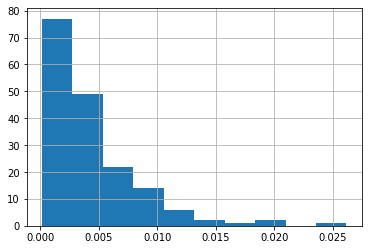

In [76]:
df_check_nans['nan_ratio'] = df_check_nans[True]/(df_check_nans[False]+df_check_nans[True])
df_check_nans['nan_ratio'].hist()

The ratio of null values for each station is very low, so we'll remove those observations.

In [108]:
df_flux = df_flux.dropna()

## Check data distribution

<AxesSubplot:xlabel='flux', ylabel='Count'>

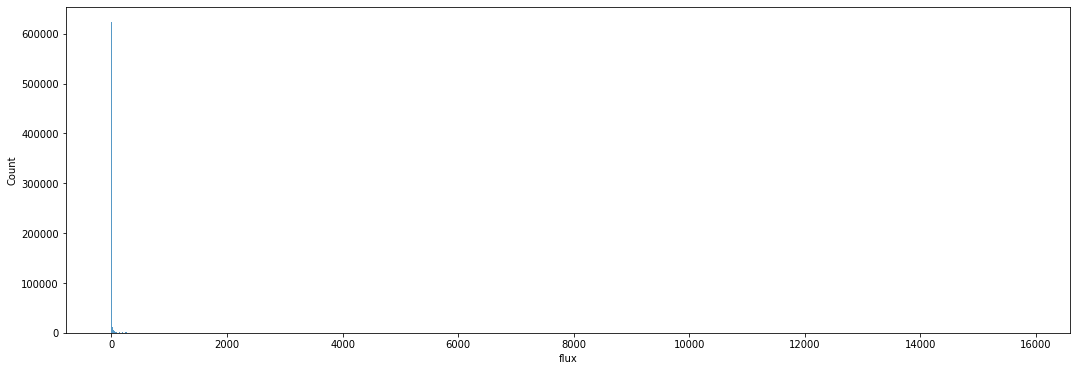

In [109]:
plt.figure(figsize=(18,6))
sns.histplot(df_flux['flux'])

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

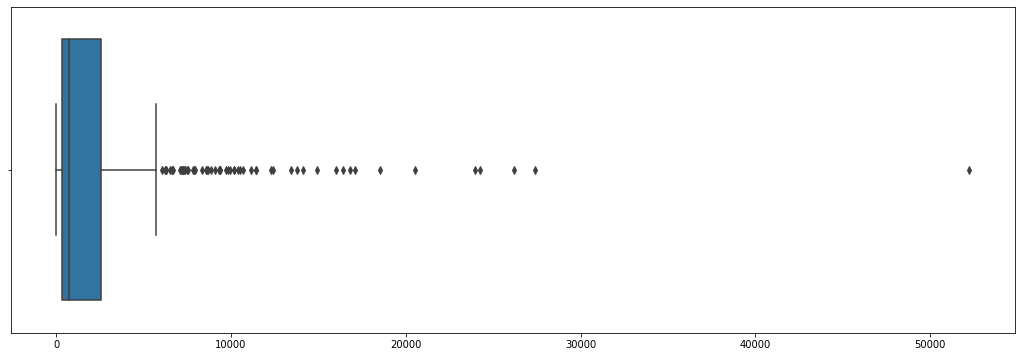

In [110]:
plt.figure(figsize=(18,6))
sns.boxplot(df_flux['area_km2'].unique())

<AxesSubplot:ylabel='Count'>

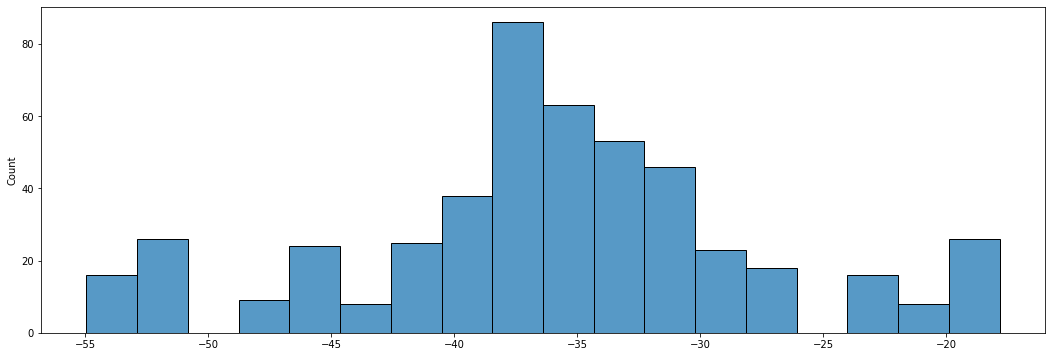

In [111]:
plt.figure(figsize=(18,6))
sns.histplot(df_flux['lat'].unique())

<AxesSubplot:ylabel='Count'>

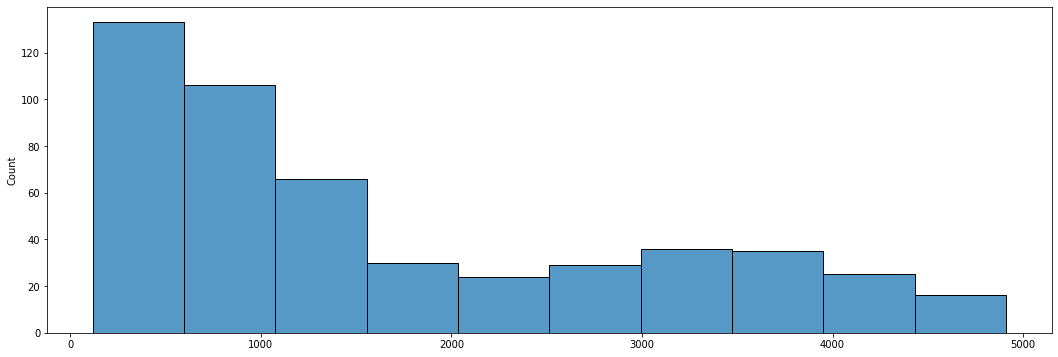

In [112]:
plt.figure(figsize=(18,6))
sns.histplot(df_flux['mean_elev'].unique())

Latitude and elevation are good candidates to be used as clustering variables. For the EDA let's look at how the flux, temperature and precipitation behave for initial clusterings on those 2. We can group stations as follows:

- Latitude:
    - ],-50]
    - ]-50,-47]
    - ]-47,-25]
    - ]-25, ]
- Mean Elevation:
    - ],2200]
    - ]2200,]

In [113]:
# group for latitude, 1 is the northest group and 4 the southest
conditions = [
    (df_flux['lat']<=-50),
    (-50<df_flux['lat']) & (df_flux['lat']<=-47),
    (-47<df_flux['lat']) & (df_flux['lat']<=-25),
    (-25<df_flux['lat']),
    ]
values = ['lat_group_4', 
          'lat_group_3', 
          'lat_group_2',
          'lat_group_1']
df_flux['lat_group'] = np.select(conditions, values)
# group for mean_elev, 1st has less elevation than 2nd
conditions = [
    (df_flux['mean_elev']<=2200),
    (2200<df_flux['mean_elev'])
    ]
values = ['mean_elev_group_1', 
          'mean_elev_group_2',]
df_flux['mean_elev_group'] = np.select(conditions, values)

[Text(0.5, 1.0, 'flux')]

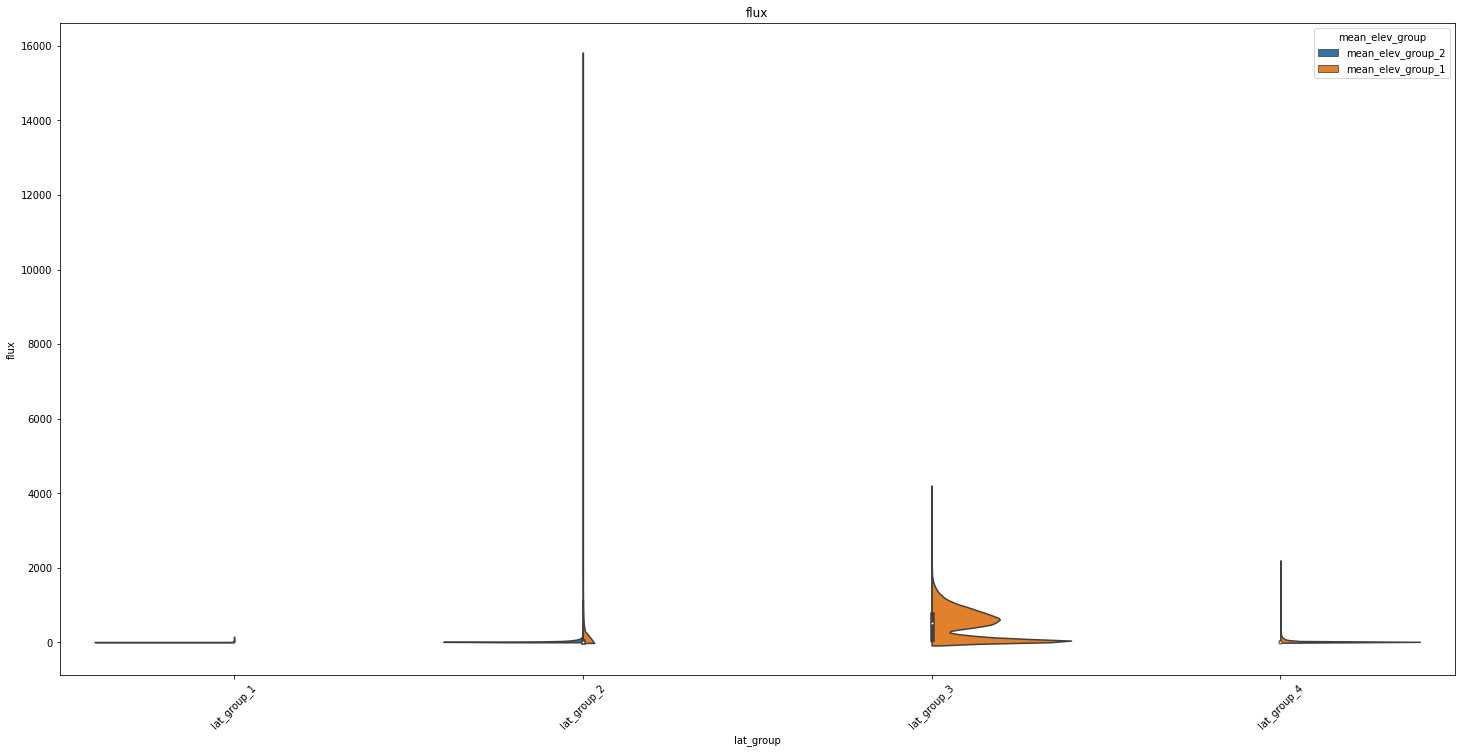

In [114]:
plt.figure(figsize=(25,12))
plt.xticks(rotation=45)
sns.violinplot(x=df_flux["lat_group"], 
            y=df_flux["flux"],
            hue=df_flux["mean_elev_group"],
            split=True,
            dodge=False).set(title='flux dist over chosen categorical variables')

[Text(0.5, 1.0, 'flux')]

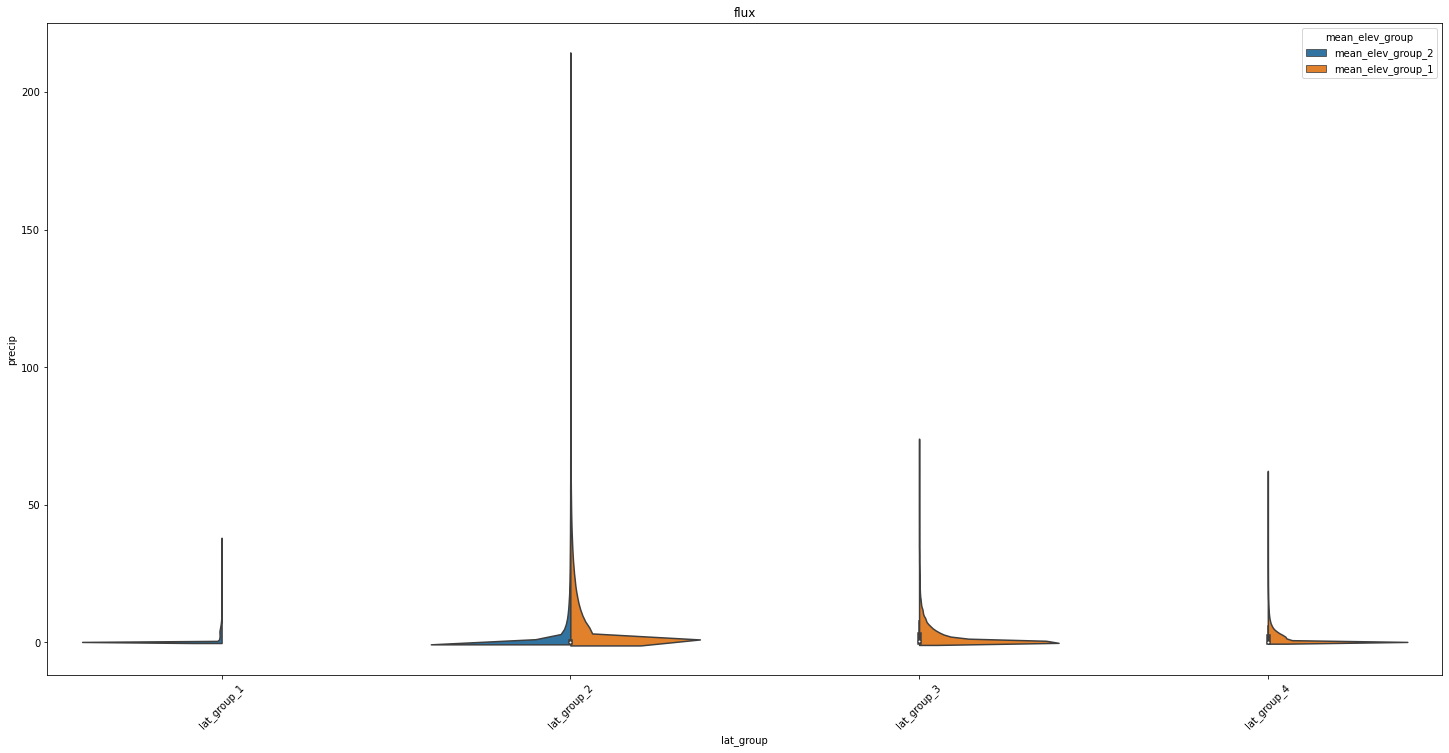

In [115]:
plt.figure(figsize=(25,12))
plt.xticks(rotation=45)
sns.violinplot(x=df_flux['lat_group'], 
            y=df_flux['precip'],
            hue=df_flux['mean_elev_group'],
            split=True,
            dodge=False).set(title='Precipitation dist over chosen categorical variables')

[Text(0.5, 1.0, 'flux')]

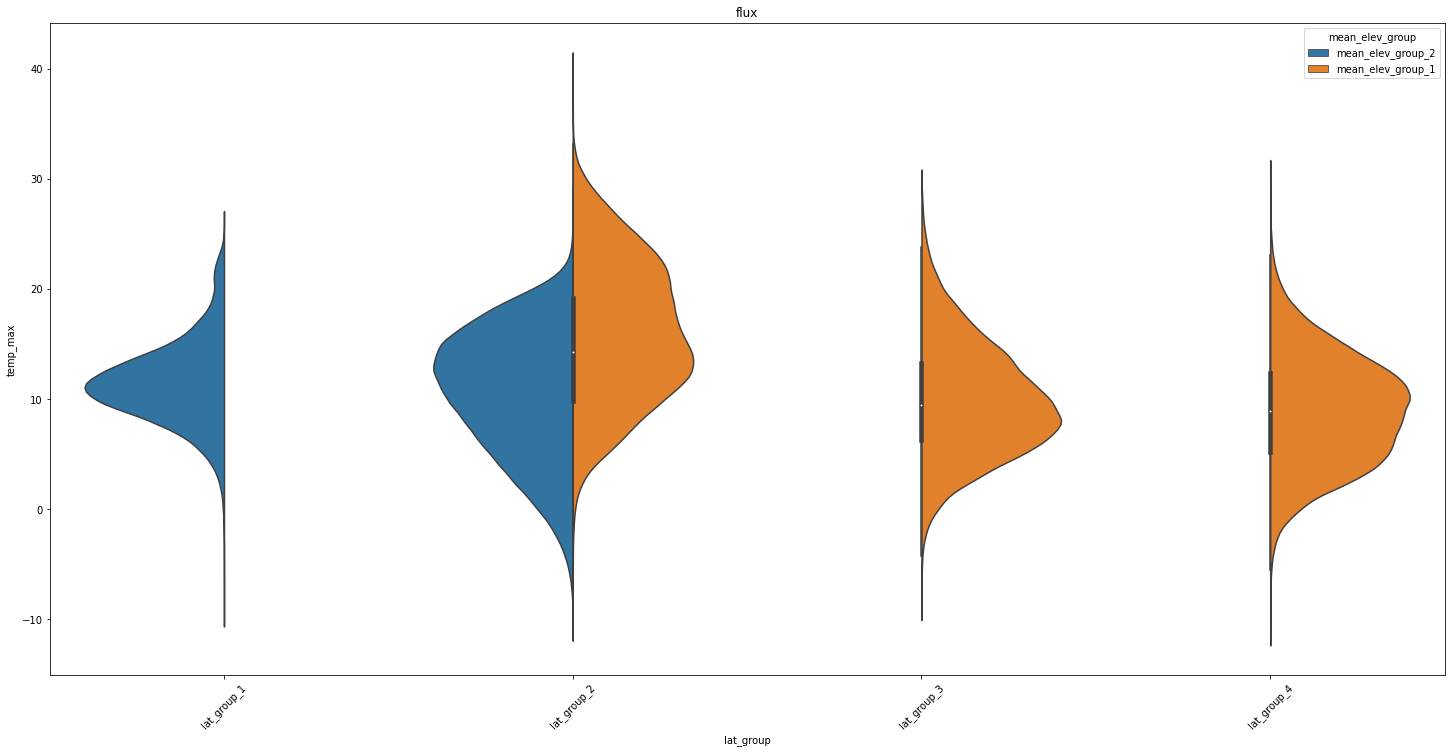

In [116]:
plt.figure(figsize=(25,12))
plt.xticks(rotation=45)
sns.violinplot(x=df_flux['lat_group'], 
            y=df_flux['temp_max'],
            hue=df_flux['mean_elev_group'],
            split=True,
            dodge=False).set(title='Max Temp dist over chosen categorical variables')

The stations that are located in the northern part of Chile all belong to the group of stations higher than 2200 meters above sea level. That would explain why the max temperature of those is not much higher than the stations in the south, which are all below 2200.

In the second group by latitude we observe that elevation has a clear effect on max temperature.

Further analysis should be made by removing zero values of flux and precipitation to distinguish what happens in those cases given each one of the variables we chose to group by.

## Functions

In [128]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
    """Plots a timeseries of given parameters
    
    Args:
        cod_station (int): station code of the station to plot
        variable (str): variable name to plot
        min_date (str): string of the min date to plot (format yyyy-mm-dd)
        max_date (str): string of the max date to plot (format yyyy-mm-dd)
    """
    min_date = dt.datetime.strptime(min_date, '%Y-%m-%d')
    max_date = dt.datetime.strptime(max_date, '%Y-%m-%d')
    
    mask_1 = df_flux['basin_id']==cod_station
    mask_2 = min_date <= df_flux['date']
    mask_3 = df_flux['date']<=max_date
    df_flux_filtered = df_flux[mask_1 & mask_2 & mask_3]
    
    plt.figure(figsize=(25,6))
    plt.plot(df_flux_filtered['date'], 
             df_flux_filtered[variable])
    #plt.title("Time series of "+variable+" of the station "+cod_station + "between "+str(min_date))

In [193]:
def bound_column(df,var):
    """Bound values of chosen var between 0 and 1"""
    #df = df.copy()
    return (df[var]-df[var].min())/(df[var].max()-df[var].min())    

def plot_three_timeseries(cod_station, min_date, max_date):
    """Plots 3 timeseries of given parameters
    
    Args:
        cod_station (int): station code of the station to plot
        min_date (str): string of the min date to plot (format yyyy-mm-dd)
        max_date (str): string of the max date to plot (format yyyy-mm-dd)
    """
    min_date = dt.datetime.strptime(min_date, '%Y-%m-%d')
    max_date = dt.datetime.strptime(max_date, '%Y-%m-%d')
    
    
    cols_select =['basin_id','date','flux','temp_max','precip']
    df_flux_filtered = df_flux[cols_select]
    
    df_flux_filtered['flux_n'] = bound_column(df_flux_filtered,'flux')
    df_flux_filtered['temp_max_n'] = bound_column(df_flux_filtered,'temp_max')
    df_flux_filtered['precip_n'] = bound_column(df_flux_filtered,'precip')
    
    
    mask_1 = df_flux_filtered['basin_id']==cod_station
    mask_2 = min_date <= df_flux_filtered['date']
    mask_3 = df_flux_filtered['date']<=max_date
    df_flux_filtered = df_flux_filtered[mask_1 & mask_2 & mask_3]
    
    plt.figure(figsize=(25,6))
    plt.plot(df_flux_filtered['date'], df_flux_filtered['flux_n'], label='flux')
    plt.plot(df_flux_filtered['date'], df_flux_filtered['temp_max_n'], label='temp_max')
    plt.plot(df_flux_filtered['date'], df_flux_filtered['precip_n'], label='precip')
    plt.legend()

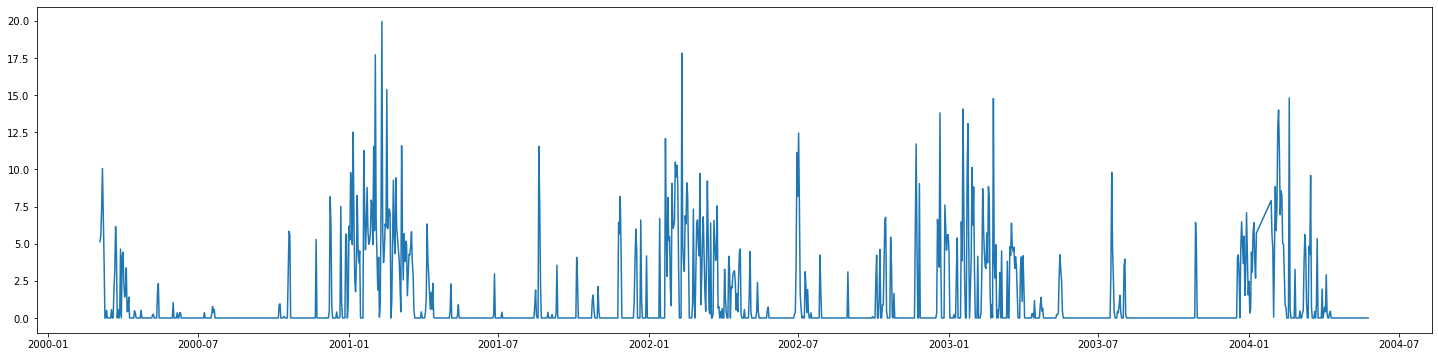

In [195]:
plot_one_timeserie(1001001,'precip','2000-03-04','2020-03-04')

C:\Users\EXMACH~1\AppData\Local\Temp/ipykernel_23556/3210905886.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flux_filtered['flux_n'] = bound_column(df_flux_filtered,'flux')
C:\Users\EXMACH~1\AppData\Local\Temp/ipykernel_23556/3210905886.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flux_filtered['temp_max_n'] = bound_column(df_flux_filtered,'temp_max')
C:\Users\EXMACH~1\AppData\Local\Temp/ipykernel_23556/3210905886.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of

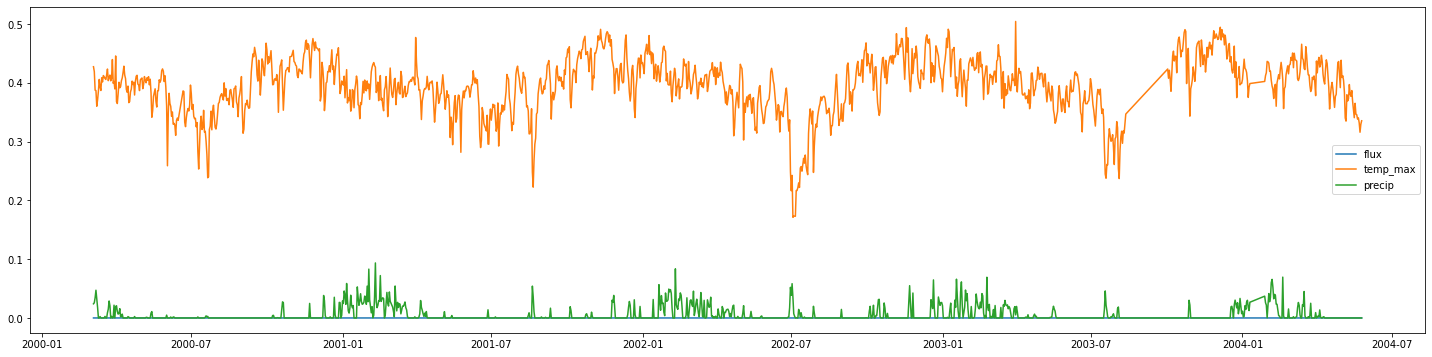

In [200]:
plot_three_timeseries(1001001,'2000-03-04','2021-08-04')